# Salary Prediction

Corresponding  with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Regression](#regression)
- [Part III - Interpret Results](#interpret)


<a id='intro'></a>
### Introduction

Linear Regression is very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of a Linear Regression model associated with salaries.  Your goal is to work through this notebook to understand what variables are related to salary, and how exactly they are related.

As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `salary_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
df = pd.read_csv('salary_data (1).csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
num_rows = df.shape[0]  # or use len(df)
print(f'Number of rows in the DataFrame: {num_rows}')

Number of rows in the DataFrame: 373



Missing data in each column:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


`c)` Do any of the rows have missing values? [Helpful pandas link - `Dataframe.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [helpful pandas link - `Dataframe.sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

If there are missing values, determine a method for dealing with them.

In [4]:
missing_data = df.isnull().sum()
print("\nMissing data in each column:")
print(missing_data)


Missing data in each column:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [5]:
missing_data_rows = df[df.isnull().any(axis=1)]

print("Rows with missing data:")
print(missing_data_rows)

Rows with missing data:
Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []


In [7]:
df_large = pd.concat([df]*100, ignore_index=True)  # Create a larger DataFrame

rows_to_drop = [172, 260]
df_modified = df_large.drop(index=rows_to_drop)

# Join the modified DataFrame with the original DataFrame
# Here, we will concatenate them vertically
df_combined = pd.concat([df, df_modified], ignore_index=True)

# Display the new DataFrame
print(df_combined)

       Age  Gender Education Level                      Job Title  \
0       32    Male      Bachelor's              Software Engineer   
1       28  Female        Master's                   Data Analyst   
2       45    Male             PhD                 Senior Manager   
3       36  Female      Bachelor's                Sales Associate   
4       52    Male        Master's                       Director   
...    ...     ...             ...                            ...   
37666   35  Female      Bachelor's       Senior Marketing Analyst   
37667   43    Male        Master's         Director of Operations   
37668   29  Female      Bachelor's         Junior Project Manager   
37669   34    Male      Bachelor's  Senior Operations Coordinator   
37670   44  Female             PhD        Senior Business Analyst   

       Years of Experience  Salary  
0                      5.0   90000  
1                      3.0   65000  
2                     15.0  150000  
3                      

In [8]:
df = df_combined
print(df)

       Age  Gender Education Level                      Job Title  \
0       32    Male      Bachelor's              Software Engineer   
1       28  Female        Master's                   Data Analyst   
2       45    Male             PhD                 Senior Manager   
3       36  Female      Bachelor's                Sales Associate   
4       52    Male        Master's                       Director   
...    ...     ...             ...                            ...   
37666   35  Female      Bachelor's       Senior Marketing Analyst   
37667   43    Male        Master's         Director of Operations   
37668   29  Female      Bachelor's         Junior Project Manager   
37669   34    Male      Bachelor's  Senior Operations Coordinator   
37670   44  Female             PhD        Senior Business Analyst   

       Years of Experience  Salary  
0                      5.0   90000  
1                      3.0   65000  
2                     15.0  150000  
3                      

`d)` How many employees are in each `Education Level`? Build a bar chart to show the count of employees in each level.

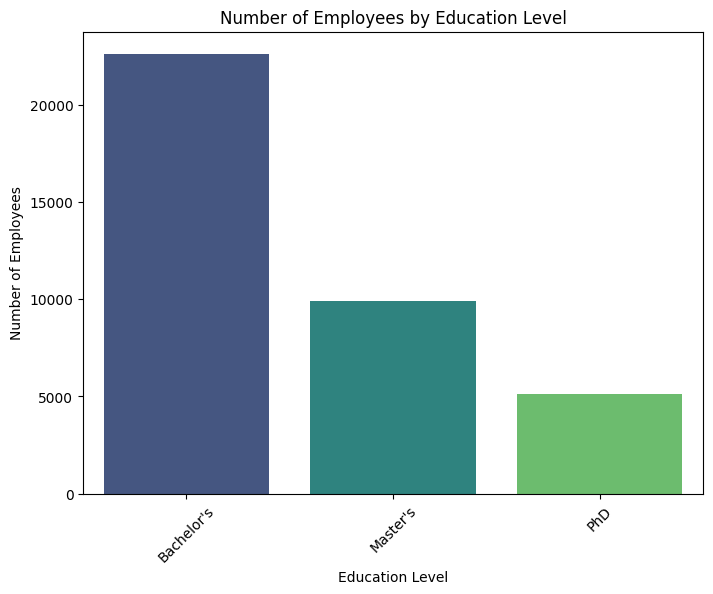

In [9]:
import seaborn as sns
education_counts = df['Education Level'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title("Number of Employees by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

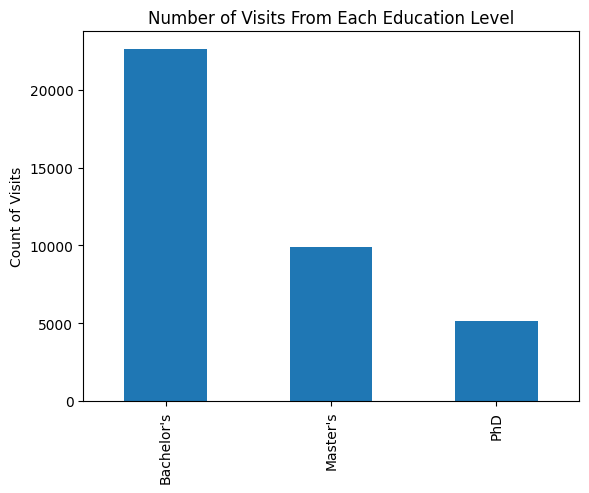

In [10]:
# bar chart of results - this part is done for you
df['Education Level'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Education Level');
plt.ylabel('Count of Visits');
plt.show();

`e)` What are the possible values for `Salary`?  What does the distribution of `Salary` look like?

Possible values for Salary:
[ 90000  65000 150000  60000 200000  55000 120000  80000  45000 110000
  75000 140000 130000  40000 125000 115000  35000 180000 190000  50000
 250000 170000 160000  85000  95000 105000  70000 100000  30000 135000
 220000 175000 185000 145000 155000    350]


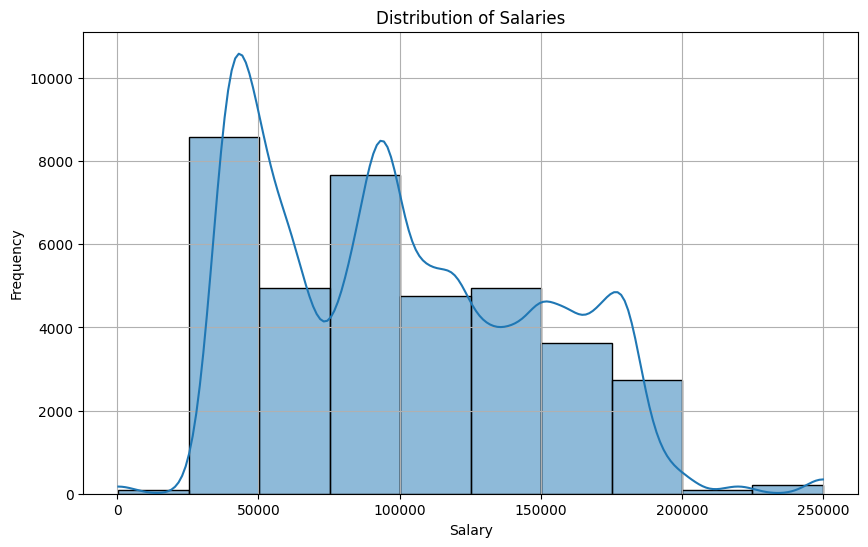

In [12]:
import seaborn as sns 

#List possible values of 'Salary'
unique_salaries = df['Salary'].unique()
print("Possible values for Salary:")
print(unique_salaries)

# Visualize the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title("Distribution of Salaries")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
 

<a id='regression'></a>
#### Part II - Regression

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `Salary`.

`a)` Consider average salary by gender, is there evidence that salaries are higher for one gender over the other? **This question is completed for you**

In [13]:
#df.query('group == "group"')['converted'].mean()
average_salary_by_gender = df.groupby('Gender')['Salary'].mean()

print("Average Salary by Gender:")
print(average_salary_by_gender)


# Check for evidence of salary differences
if average_salary_by_gender['Male'] > average_salary_by_gender['Female']:
    print("\nEvidence suggests that salaries are higher for Males.")
elif average_salary_by_gender['Male'] < average_salary_by_gender['Female']:
    print("\nEvidence suggests that salaries are higher for Females.")
else:
    print("\nThere is no evidence of salary differences between genders.")
 


Average Salary by Gender:
Gender
Female     97011.173184
Male      103863.074214
Name: Salary, dtype: float64

Evidence suggests that salaries are higher for Males.


`b)` Consider average salary by education level, is there evidence that salaries are higher for increased education?

In [14]:
average_salary_by_educ = df.groupby('Education Level')['Salary'].mean()
print(average_salary_by_educ)

Education Level
Bachelor's     74753.142819
Master's      129795.918367
PhD           157842.718447
Name: Salary, dtype: float64


`c)` Consider average salary by years of experience, is there evidence that salaries are associated with increased years of experience?

In [15]:
average_salary_by_exp = df.groupby('Years of Experience')['Salary'].mean()
print(average_salary_by_exp)

Years of Experience
0.0      33333.333333
0.5      35000.000000
1.0      37857.142857
1.5      36279.166667
2.0      41774.193548
3.0      51166.666667
4.0      58500.000000
5.0      64117.647059
6.0      83750.000000
7.0      84444.444444
8.0      88800.000000
9.0     101818.181818
10.0    100555.555556
11.0    100500.000000
12.0    105000.000000
13.0    120000.000000
14.0    125769.230769
15.0    134375.000000
16.0    157509.631260
17.0    143000.000000
18.0    149607.469512
19.0    166333.333333
20.0    168846.153846
21.0    173846.153846
22.0    162222.222222
23.0    177500.000000
24.0    250000.000000
25.0    200000.000000
Name: Salary, dtype: float64


`d)`  To make use of Job Title column, let's create a bool flag based on word existence

List of words: 

* Director
* Junior
* Senior
* Manager
* Analyst
* Engineer

**This question is completed for you**

In [16]:
 
# Read the CSV file into a DataFrame
df = pd.read_csv('salary_data (1).csv')

# Define the list of words to create flags for
flag_words = ['Director', 'Junior', 'Senior', 'Manager', 'Analyst', 'Engineer']

# Create boolean flags based on word existence in Job Title
for word in flag_words:
    df['is_' + word] = df['Job Title'].str.contains(word, case=False, na=False)

# Display the updated DataFrame
print(df)

     Age  Gender Education Level                      Job Title  \
0     32    Male      Bachelor's              Software Engineer   
1     28  Female        Master's                   Data Analyst   
2     45    Male             PhD                 Senior Manager   
3     36  Female      Bachelor's                Sales Associate   
4     52    Male        Master's                       Director   
..   ...     ...             ...                            ...   
368   35  Female      Bachelor's       Senior Marketing Analyst   
369   43    Male        Master's         Director of Operations   
370   29  Female      Bachelor's         Junior Project Manager   
371   34    Male      Bachelor's  Senior Operations Coordinator   
372   44  Female             PhD        Senior Business Analyst   

     Years of Experience  Salary  is_Director  is_Junior  is_Senior  \
0                    5.0   90000        False      False      False   
1                    3.0   65000        False      Fa

`e)` Create a flag for gender where 1 is if a person is male and 0 if the person is not.

In [17]:
# Create a flag for gender
df['is_male'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Display the updated DataFrame
print(df)

     Age  Gender Education Level                      Job Title  \
0     32    Male      Bachelor's              Software Engineer   
1     28  Female        Master's                   Data Analyst   
2     45    Male             PhD                 Senior Manager   
3     36  Female      Bachelor's                Sales Associate   
4     52    Male        Master's                       Director   
..   ...     ...             ...                            ...   
368   35  Female      Bachelor's       Senior Marketing Analyst   
369   43    Male        Master's         Director of Operations   
370   29  Female      Bachelor's         Junior Project Manager   
371   34    Male      Bachelor's  Senior Operations Coordinator   
372   44  Female             PhD        Senior Business Analyst   

     Years of Experience  Salary  is_Director  is_Junior  is_Senior  \
0                    5.0   90000        False      False      False   
1                    3.0   65000        False      Fa

`f)` Use statsmodels to fit a linear model to predict salary using each of the features from `a-e`.  These include:
* Gender
* Job TItle
* Years of Experience
* Education

In [18]:
import statsmodels.api as sm
# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

# Convert boolean columns to integers (if any)
for col in df_encoded.select_dtypes(include=['bool']).columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Define the dependent variable (Salary) and independent variables
X = df_encoded.drop('Salary', axis=1)  # Independent variables
y = df_encoded['Salary']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(y, X).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     66.40
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          8.65e-121
Time:                        13:32:57   Log-Likelihood:                -3781.7
No. Observations:                 373   AIC:                             7921.
Df Residuals:                     194   BIC:                             8623.
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

<a id='interpretation'></a>
### Part III - Interpret Results

`1.` Consider you are tasked with finding which features in your linear model are significantly related to salary.  Were there any features that were not significantly related to salary in your first model?  If not, remove those features and fit a new model.  Only keep the features that were significant from the original model.

In [18]:
# explain your answer and fit a new model with the reduced set of features here
# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

# Define the dependent variable (Salary) and independent variables
X = df_encoded.drop('Salary', axis=1)  # Independent variables
y = df_encoded['Salary']  # Dependent variable

# Check data types
print("Data types before conversion:")
print(X.dtypes)

# Convert boolean columns to integers if any
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)

# Check for NaN values
if X.isnull().values.any() or y.isnull().values.any():
    print("There are NaN values in the data.")
else:
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the linear model
    model = sm.OLS(y, X).fit()

    # Display the summary of the model
    print(model.summary())

    # Identify features with p-values greater than 0.05
    insignificant_features = model.pvalues[model.pvalues > 0.05].index.tolist()

    # Remove the intercept from the list if it's included
    if 'const' in insignificant_features:
        insignificant_features.remove('const')

    # Create a new DataFrame without insignificant features
    X_reduced = X.drop(columns=insignificant_features)

    # Fit a new model with only significant features
    new_model = sm.OLS(y, X_reduced).fit()

    # Display the summary of the new model
    print(new_model.summary())

Data types before conversion:
Age                             int64
Years of Experience           float64
is_Director                      bool
is_Junior                        bool
is_Senior                        bool
                               ...   
Job Title_UX Designer           uint8
Job Title_UX Researcher         uint8
Job Title_VP of Finance         uint8
Job Title_VP of Operations      uint8
Job Title_Web Developer         uint8
Length: 185, dtype: object
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     66.40
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          8.65e-121
Time:                        10:36:22   Log-Likelihood:                -3781.7
No. Observations:                 373   AIC:       

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     195.5
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          1.10e-210
Time:                        10:36:22   Log-Likelihood:                -3921.4
No. Observations:                 373   AIC:                             7939.
Df Residuals:                     325   BIC:                             8127.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

`a)` With each additional year of experience, what is the expected change in salary?  What is the 95% confidence interval of the change?

$581.33, 95%  confidence interval = 0.010

`b)` What is the expected difference in salary between someone with a senior title and someone with none of the other title indications?

$11,180.00

`c)` What is the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree?  What is the 95% confidence interval of the change?

$13,250.00, 95% confidence interval = 0.000

`d)` If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?

**Your Answer Here**

`e)` Imagine that the employee in question `d)` actually has a salary of $110,000, what would the residual be for this employee?

**Your Answer Here**

`f)` How well do you think your model fits?  What metrics or plots would you consider to understand if this model does a good job of predicting salary?

In [5]:
### Your work here

**Your Answer Here**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the salary prediction project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.